## Nedbørsoppgaven Del 3: Plotting av tidsserier

Når man skal jobbe med et datasett er å lage figurer et av de viktigste verktøyene man har. Dette gjelder i starten når man prøver å få oversikten over dataene, men også seinere når man skal presentere resultater.

I denne oppgaven skal vi se på tidsserier. I oppgaven "Figurer" er denne oppgaven inkludert, men også et par flere måter å visualiere data. 

In [6]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
import matplotlib
import requests # for filinnlasting
import io # for filinnlasting
from EkteDataFunk import loadData # for filinnlasting

En av de aller enkleste figurene er et linjeplot. For en funksjon f(x) er x langs første-aksen, og f(x) langs andre-aksen. I dette eksempelet har vi temperatur som en funksjon av tid, så vi får tid langs første-aksen og temperatur langs andre-aksen. 

Last inn et datasett å jobbe med. I denne oppgaven bruker vi års-temperatur i Bergen fra 1860 til 2020. Siden funkjsonen her er en funksjon av tid er dette en tidsserie. 
I oppgaven "RyddDatasett" og "Funksjoner" er det detaljer på hvordan filinnlastingen fungerer.

In [8]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)

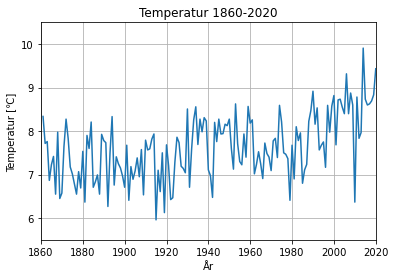

In [9]:
ax=plt.axes() # Lag akser å plotte i

# Plot tidsserien
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5]) # Sett grense for y-aksen
ax.grid() # Legg til rutenett (grid) i bakgrunnen
plt.show() # Denne linjen er kun med så vi slipper unødvendig tekstoutput. 
           # Du kan jo kommentere den ut for å se om du vil. 

Men har mye valgfrihet når man skal lage figurer. Alle farger, tekststørrelse, figurstørrelse, akser, grenser, verdier/tekst langs aksene og mye mer kan endres. Det enkleste å gjøre når man skal finne ut hvordan man skal endre på noe er å lese dokumentasjon til funksjoner i `matplotlib`. `matplotlib` er et stort bibliotek for plotting av figurer i python, og det meste du trenger finnes her. Det skal sies at det å lese dokumentasjon er en treningssak. Det kan være overveldende i starten, og vanskelig å finne ut hvor i all informasjonen den informasjonen du er på jakt etter finnes, men dette blir lettere etterhvert.

Si at du vil at linjen heller skal være oransje og at alle faktiske datapunkt skal være markert med en grønn femkant. Da ville jeg googlet f.eks. "matplotlib line color python", trykket meg inn på dokumentasjonslinken som kommer opp. I dette tilfellet kommer jeg til denne nettsiden https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. 
Dette er en under-side i dokumentasjonen til Matplotlib. Ganske tidlig på siden er det noen eksempler på å endre linjefarge og sette markør, men for å finne informasjon om hvordan jeg setter markøren til en femkant og gjøre den grønn må man skrolle lengre ned på siden til man finner "Other Parameters:". Under ** kwargs (keyword arguemts) kommer en lang liste. Kolonnen "Properties" er det vi er ute etter. Dette er alle "keywordene" man kan gi til `plt.plot`, f.eks "color". Måten man bruker dette er f.eks. `plt.plot(tid,temp), color='green')`. Dette gir en grønn linje istedet for en blå. `color='green'` er et "keyword argument pair". For informasjon om hvert enkelt keyword trykker man på lenken deres og finner hvile mulige input de kan få.

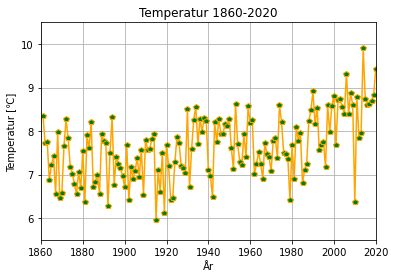

In [5]:
ax=plt.axes()

# Plot tidsserien, og definer hvordan linjen skal se ut
ax.plot(
    tid,temp,
    color='orange',
    marker='p',
    markerfacecolor='green')

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
ax.grid() # legg til rutenett (grid) i bakgrunnen
plt.show() 

Oppgave 1:
Lag samme figur som over, men bruk røde stjerner som markør og ingen linje istedet.

Oppgave 2:
Lag samme figur som over, men lag tittlen større. Dette krever et nytt søk i dokumentasjonen. Tips: inkluder "title" og "fontsize" i søkeordene dine. Plot i nye farger, markører og linjestil. Ha også forskjellig farge på selve markøren og kanten til markøren.

Oppgave 3: Lag en ny figur og plot både 
- hele tidsserien, 
- hvert tiende datapunkt. Se på oppgaven om indeksering (Del 1) for tips. 
- +/- standardavvik av hvert av disse datapunktene i lysegrå linjer. numpy sin funksjon for standardavvik er np.std(). 

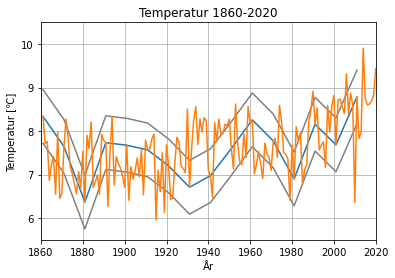

In [16]:
ax=plt.axes() # Lag akser å plotte i

# Plot tidsserien
ax.plot(tid[::10], temp[::10]+np.std(temp[::10]),    color='grey')
ax.plot(tid[::10], temp[::10]-np.std(temp[::10]),    color='grey')
ax.plot(tid[::10], temp[::10])
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5]) # Sett grense for y-aksen
ax.grid() # Legg til rutenett (grid) i bakgrunnen
plt.show() # Denne linjen er kun med så vi slipper unødvendig tekstoutput. 
    

Hvordan synes du hver tiende datapunkt representerer den originale tidsserien? Holder det å bare plotte hvert tiende datapunkt for å få frem hovedbudskapet? Hvilken informasjon får du ut av linjene med standardavvik?

Det er nok mange ting å forbedre med denne figuren, men to ting skal vi se på i oppgaven om "for-løkker" og til slutt i hovedoppgaven. **Det første** er at det ofte er bedre å se på gjennomsnittet av intervaller heller enn en eksempelverdi fra intervallet. I dette eksempelet ville man f.eks. plottet et gjennmonsnitt av hver tiårsperiode heller enn hver tiende verdi. **Det andre** er at verdier som standardavviket ofte endrer seg over tid. Derfor er det gjerne mer informativt å plotte standaravvik for intervallet, f.eks. hver tiårsperiode som her, heller enn standardavviket for hele tidsserien. Men for dette må man iterere gjennom intervallene man vil dele datasettet sitt inn i, og for dette trenger man ofte for-løkker. Vi kommer tilbake til dette. 

